# WELCOME TO THE COVID-19 CASE LOAD FORECASTING MODEL

This Module helps predict the number of covid-19 cases in a future time period for each state in India. It is divided into 3 parts:
1. General India Situation
2. State Specific Forecasted COVID-19 cases
3. Required Hospital Capacity


## PART 1 : GENERAL INDIA SITUATION
This part of the module analyses the overall COVID-19 situation in India. It uses built-in parameters from the IDM model based on data collected world-wide about India's COVID-19 situation. 

In [127]:
# importing libraries
import covasim as cv # importing COVASIM library by IDM 
%matplotlib inline
import matplotlib.pyplot as plt # importing Matplotlib
import pandas as pd #importing pandas

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


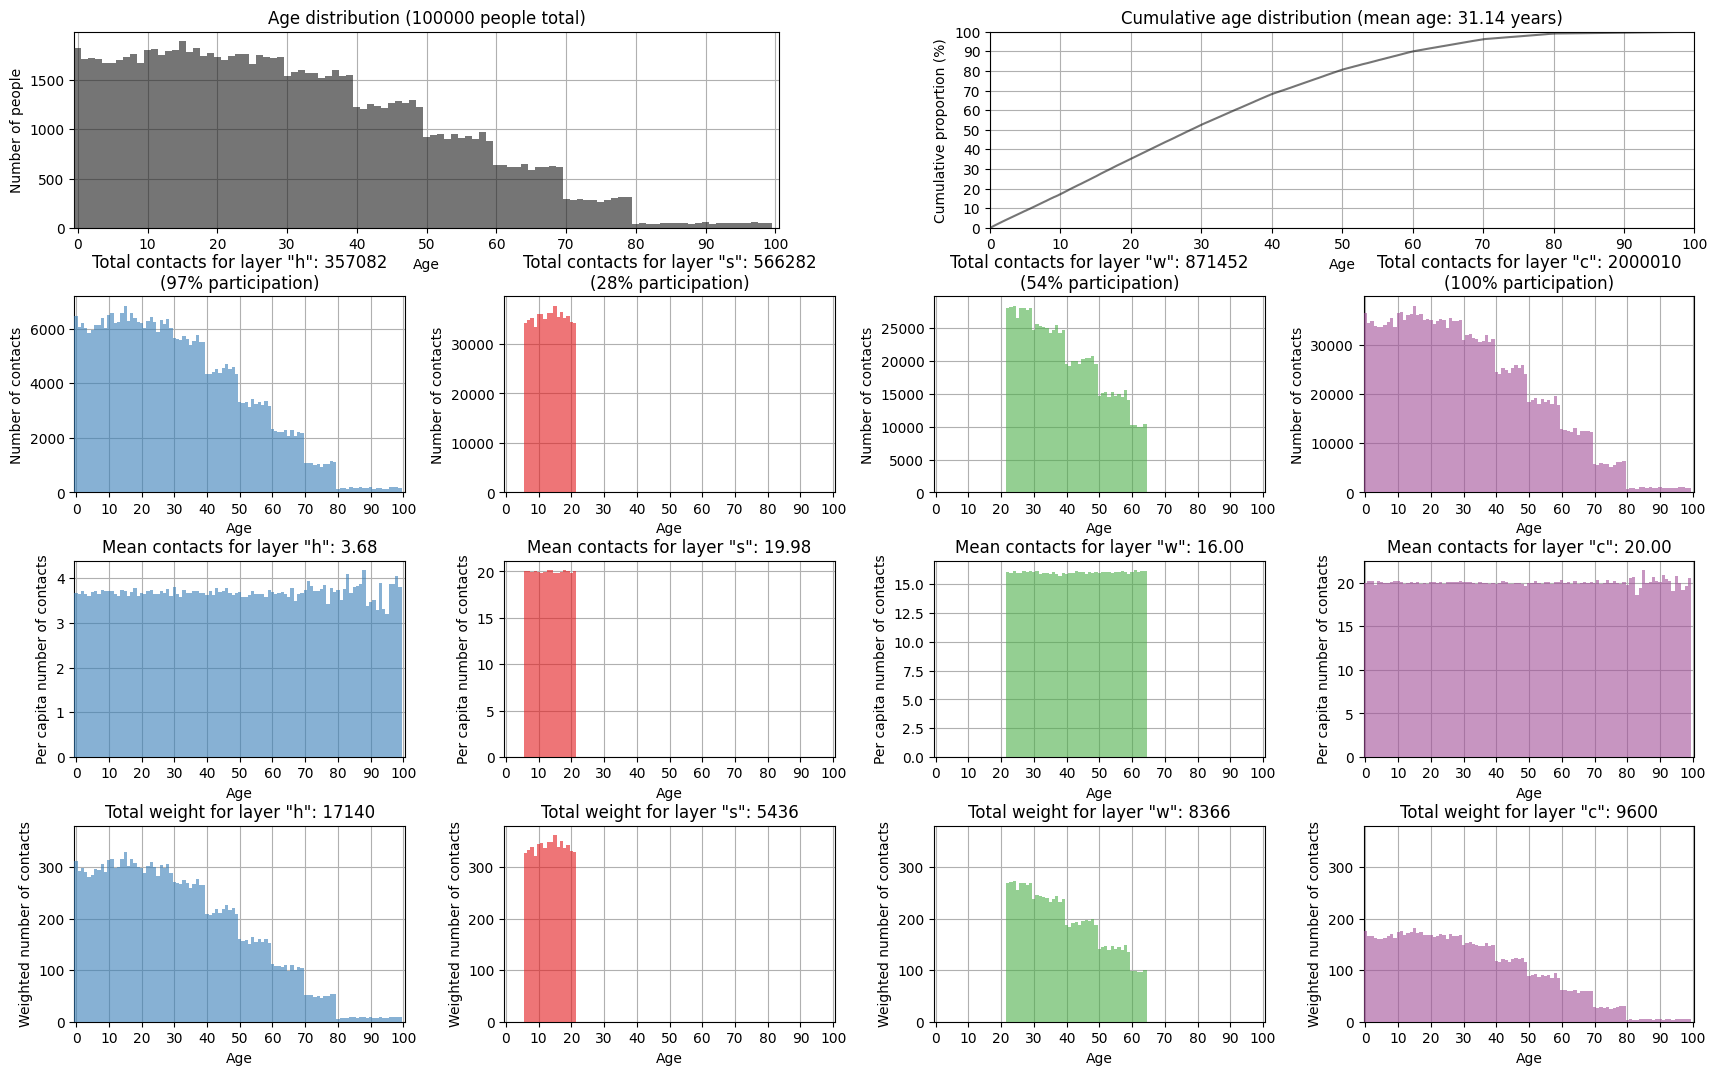

In [128]:
sim = cv.Sim()
cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook
pars = dict(
    pop_size = 100_000, # Alternate way of writing 10000
    pop_type = 'hybrid',
    location = 'India', # Case insensitive
    pop_scale=13927 # India's population multiplier
)

sim = cv.Sim(pars)
sim.initialize() # Create people
fig = sim.people.plot() # Show statistics of the people
fig.show()#plot graphs

##### Interpreting these graphs:
- The model talks about the contact (possible transmission of covid between 2 individuals) in different layers - that is at households (h), schools (s), work (w), communities (c)
- In India, 24% of the population go to school and 54% of them go to work ; however the risk of transmission is greater in schools ( 19.98 contacts ) as compared to work ( 16 contacts ) 

## PART 2 : STATE-WISE VARIATION
This part of the model provides a state wise estimate of future covid cases. In order to customize this model and get accurate results, 3 things need to be done :

### STATE OF ASSAM: 

In [134]:
# Enter Input Parameters as per above instructions
state='assam'
popinfected=8569362
startdate='2021-07-17'
enddate='2022-01-29'
collected_end='2021-10-29'
forecast_period=90 # number of days

In [135]:
#state-wise population multiplication factor updates as per 2011 census for UTs and 2018 population for other states
states={'uttar pradesh': 2239,
       'maharashtra': 1249,
       'bihar': 1038,
       'west bengal': 988,
       'andhra pradesh' : 876,
       'madhya pradesh' : 830,
       'tamil nadu' : 803,
       'rajasthan' : 771,
       'karnataka' : 682,
       'gujarat': 689,
       'odisha': 462,
       'kerela': 347,
       'jharkhand': 342,
       'assam' : 327,
       'punjab': 305,
       'haryana': 282,
       'chhatisgarh':271,
       'jammu and kashmir':146,
       'uttarakhand':114,
       'himachal pradesh': 72,
       'tripura': 39,
       'meghalaya':33,
       'manipur':33,
       'nagaland':21,
       'goa':16,
       'arunachal pradesh':15,
       'mizoram': 12,
       'sikkim':7,
       'delhi': 168,
       'puducherry': 12,
       'chandigarh':10,
       'andaman and niccobar island':4,
       'dadra and nagar haveli': 3,
       'daman and diu': 2,
       'lakshadweep': 0.6}

def Inputs(state, popinfected, startday,endday):
    pars=dict(
    pop_size  = 100_000,
    pop_infected = popinfected/states[state],
    pop_type = 'random',
    start_day = startday,
    end_day   = endday,
    pop_scale=states[state]
)
    return pars

In [137]:
datafile='data_assam.csv'

## PREDICTIVE MODEL

Model Error:
The current model estimates on average 0.397121 more/less diagnoses per day


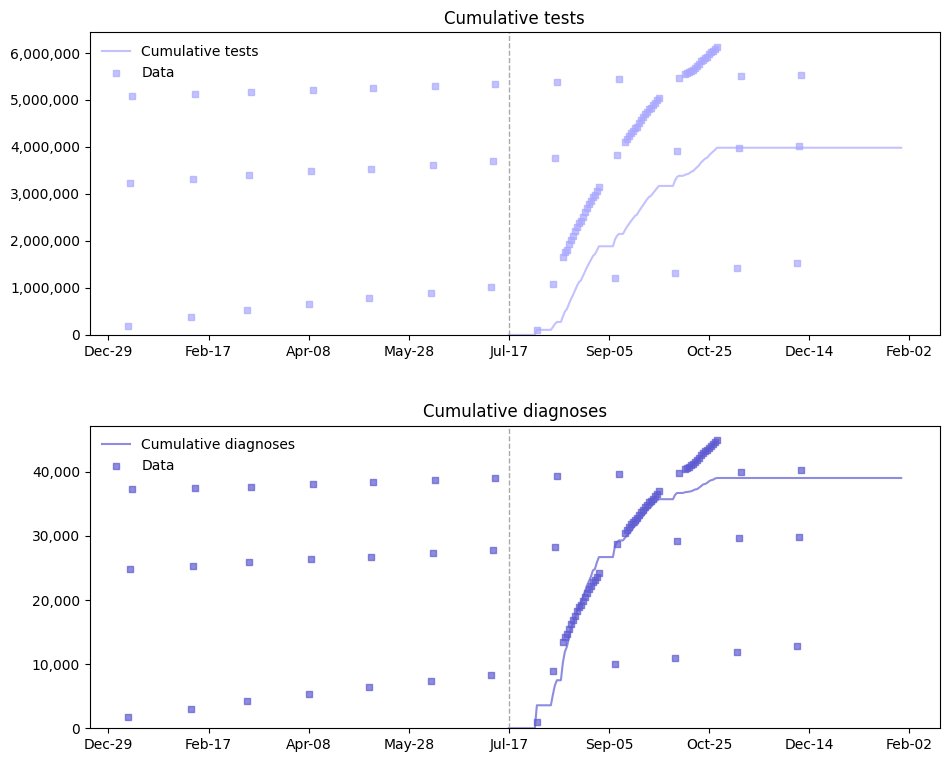

In [139]:

pars=Inputs(state,popinfected,startdate,enddate)
sim = cv.Sim(pars=pars, datafile=datafile, interventions=[cv.test_num(daily_tests='data')])


sim['rel_death_prob'] = 0.28 # Double the death rate since deaths were too low
sim['beta'] = 0.0062
sim['rel_symp_prob']=0.58
sim.initialize(reset=True) # Reinitialize the sim

# Rerun and compute fit
sim.run()
fit = sim.compute_fit()
error=fit.mismatches[2]/forecast_period


print("Model Error:")
print("The current model estimates on average %f more/less diagnoses per day" %(error)) 


sim.plot(to_plot=['cum_tests','cum_diagnoses'])

In [141]:
sim.to_excel('newoutput')
result = pd.read_excel (r'newoutput.xlsx')

infections=result[['date','new_infections']]
x=infections[['date']]
y=infections[['new_infections']]
infections['forecasted'] = 0
infections.loc[(infections['date']>collected_end), 'forecasted'] = 1

Object saved to /Users/aparnaakk/Desktop/Untitled Folder/newoutput.xlsx.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## FORECASTING MODEL

Average Daily Cases till 2021-10-29
1484.1299323226926


Forecasted Average Daily Cases:
351.4988852524386


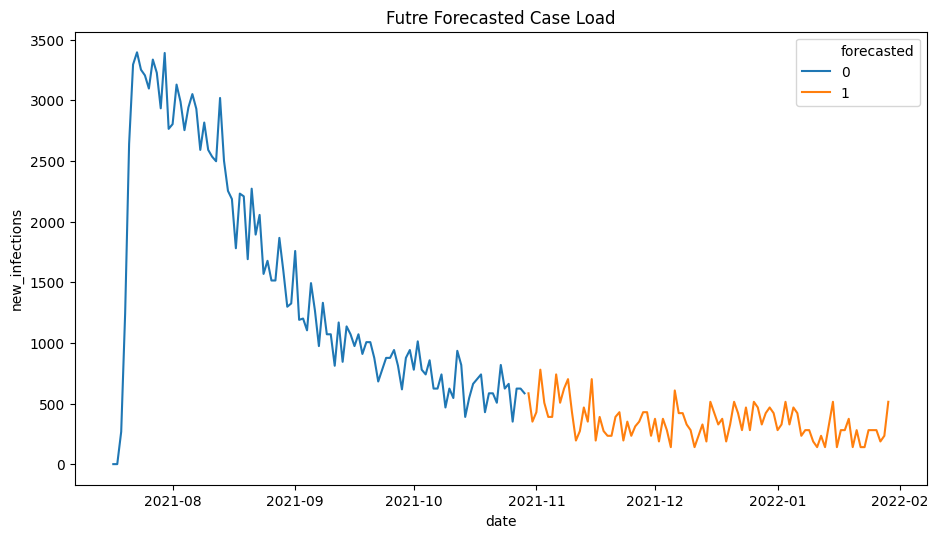

In [144]:
import seaborn as sns
plt.figure(figsize=(11, 6))
plt.title('Futre Forecasted Case Load')
sns.lineplot(data=infections, x="date", y="new_infections",hue='forecasted')
old=infections[infections['forecasted']==0]
new=infections[infections['forecasted']==1]
old_mean=old['new_infections'].mean()
new_mean=new['new_infections'].mean()
print("Average Daily Cases till %s"%(collected_end))
print(old_mean)
print("\n\nForecasted Average Daily Cases:")
print(new_mean)